In [1]:
import numpy as np
import pandas as pd
import gzip
import argparse
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pwd -P

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/kendall_tau_last_gen'

In [4]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']
last_gen = pd.read_csv('../key_files/final_gen.csv')['sample_name']
samples = last_gen.to_list()

#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')

sites_af = pd.Series(samples).str.split('_').str[0].astype(int)

sites_af.name = 'site'

env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

In [5]:
bio1 = env['bio12']

In [11]:
af = pd.read_csv('../key_files/allele_freq_maf05_mincount05_lastgensamples.csv')   

In [12]:
p_bar = af.mean(axis=1)

# Apply the MAF calculation using a lambda function
maf = p_bar.apply(lambda x: 1 - x if x > 0.5 else x)

In [ ]:
maf.to_csv('../key_files/maf_all_samples_last_gen.csv',index=None)

In [7]:
deltap = pd.read_csv('../key_files/delta_p_maf05_mincount05_lastgensamples.csv')

In [8]:
deltap.head()

,1_2_2,1_2_3,1_3_1,1_3_4,1_3_5,1_3_6,1_3_7,1_3_8,1_3_9,1_3_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.077353,0.063114,0.482707,0.352325,0.084993,0.114956,-0.172746,0.273725,-0.165205,-0.068810,...,0.003421,-0.047405,0.159179,0.139286,0.182493,-0.031104,0.394335,-0.024800,0.214351,0.331971
1,-0.013608,-0.047198,-0.061547,-0.066422,0.110707,0.054597,-0.059608,0.030963,0.052962,-0.065326,...,-0.025259,0.105829,-0.040566,-0.064403,-0.050163,0.067992,-0.051357,-0.058157,0.018033,-0.054994
2,0.035854,-0.036898,-0.025147,-0.085462,0.037411,-0.079464,0.507007,-0.078972,-0.064236,-0.083506,...,-0.048935,-0.080047,-0.081113,0.045648,-0.070372,0.139095,-0.076162,-0.066051,0.008938,-0.070543
3,-0.040804,0.024012,-0.049962,-0.020077,0.033954,-0.048889,-0.042568,-0.026416,-0.008640,-0.049968,...,0.045172,-0.002671,0.075177,-0.048536,-0.047425,0.084227,-0.000432,0.141513,0.131201,0.058140
4,-0.040804,0.024012,-0.049962,-0.020077,0.033954,-0.048889,-0.042568,-0.026416,-0.008640,-0.049968,...,0.045172,-0.002671,0.075177,-0.048536,-0.047425,0.084227,-0.000432,0.141513,0.131201,0.058140


In [13]:
kendall = {}

# Iterate through each row in af
for index, row in af.iterrows():
    # Apply kendalltau to the current row and bio1
    geno_k_tau, geno_k_tau_p_value = scipy.stats.kendalltau(bio1, row)
    kendall[index] = [geno_k_tau,geno_k_tau_p_value]

In [15]:
kendall = pd.DataFrame(kendall).T

In [16]:
kendall['MAF'] = maf

In [17]:
kendall.columns = ["K_tau","K_tau_p", "MAF"]

In [18]:
kendall

,K_tau,K_tau_p,MAF
0,-0.128233,3.793000e-04,0.288067
1,-0.068903,5.618413e-02,0.077929
2,0.029007,4.214665e-01,0.092449
3,-0.215472,2.387434e-09,0.078113
4,-0.215472,2.387434e-09,0.078113
...,...,...,...
1048630,0.164021,5.477516e-06,0.169091
1048631,-0.100638,5.298454e-03,0.069410
1048632,-0.100638,5.298454e-03,0.069410
1048633,0.062921,8.117636e-02,0.466354


In [19]:
#kendall.to_csv('kendall_corr_bio12.csv',index=None)

In [21]:
snps_names = pd.read_csv('../key_files/var_pos_grenenet.csv')

import pickle
with open('../key_files/blocks_snpsid_dict.pkl', 'rb') as f:
    dict_blocks = pickle.load(f)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

snps_names = snps_names[snps_names['total_alleles05filter_lastgen'].notna()].reset_index(drop=True)

kendall = pd.concat([snps_names[['id', 'pos', 'chrom']], kendall],axis=1)

kendall['block'] = kendall['id'].map(reverse_mapping) 

In [3]:
kendall.to_csv('kendall_corr_bio12.csv',index=None)

NameError: name 'kendall' is not defined

In [17]:
kendall = pd.read_csv('kendall_corr_bio12.csv')

In [18]:
kendall

,id,pos,chrom,K_tau,K_tau_p,MAF,block
0,1_346,346,1,-0.128233,3.793000e-04,0.288067,1_0
1,1_353,353,1,-0.068903,5.618413e-02,0.077929,1_0
2,1_363,363,1,0.029007,4.214665e-01,0.092449,1_0
3,1_395,395,1,-0.215472,2.387434e-09,0.078113,1_0
4,1_396,396,1,-0.215472,2.387434e-09,0.078113,1_0
...,...,...,...,...,...,...,...
1048630,5_26975078,26975078,5,0.164021,5.477516e-06,0.169091,5_3110
1048631,5_26975121,26975121,5,-0.100638,5.298454e-03,0.069410,5_3110
1048632,5_26975148,26975148,5,-0.100638,5.298454e-03,0.069410,5_3110
1048633,5_26975272,26975272,5,0.062921,8.117636e-02,0.466354,5_3110


In [19]:
biovar='bio12'

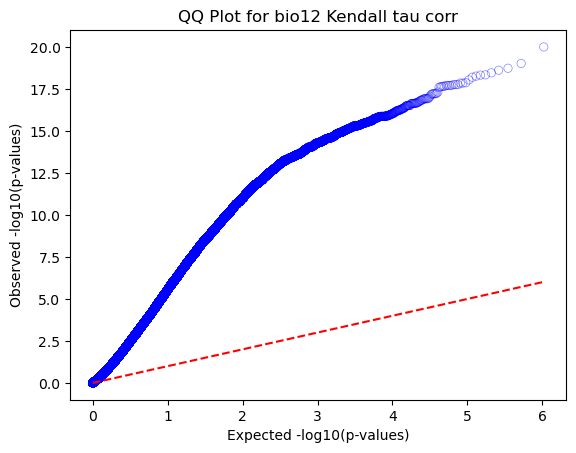

In [20]:
# Sort the p-values in ascending order
observed_quantiles = -np.log10(np.sort(kendall['K_tau_p'].values))

# Expected quantiles from the uniform distribution
expected_quantiles = -np.log10(np.linspace(1 / len(kendall), 1, len(kendall)))

# QQ plot
sns.scatterplot(x = expected_quantiles, y = observed_quantiles, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot([min(expected_quantiles), max(expected_quantiles)], [min(expected_quantiles), max(expected_quantiles)], 'r--')

plt.xlabel("Expected -log10(p-values)")
plt.ylabel("Observed -log10(p-values)")
plt.title(f'QQ Plot for {biovar} Kendall tau corr')

plt.show()

In [21]:
biovar

'bio12'

/tmp/ipykernel_641991/36481905.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


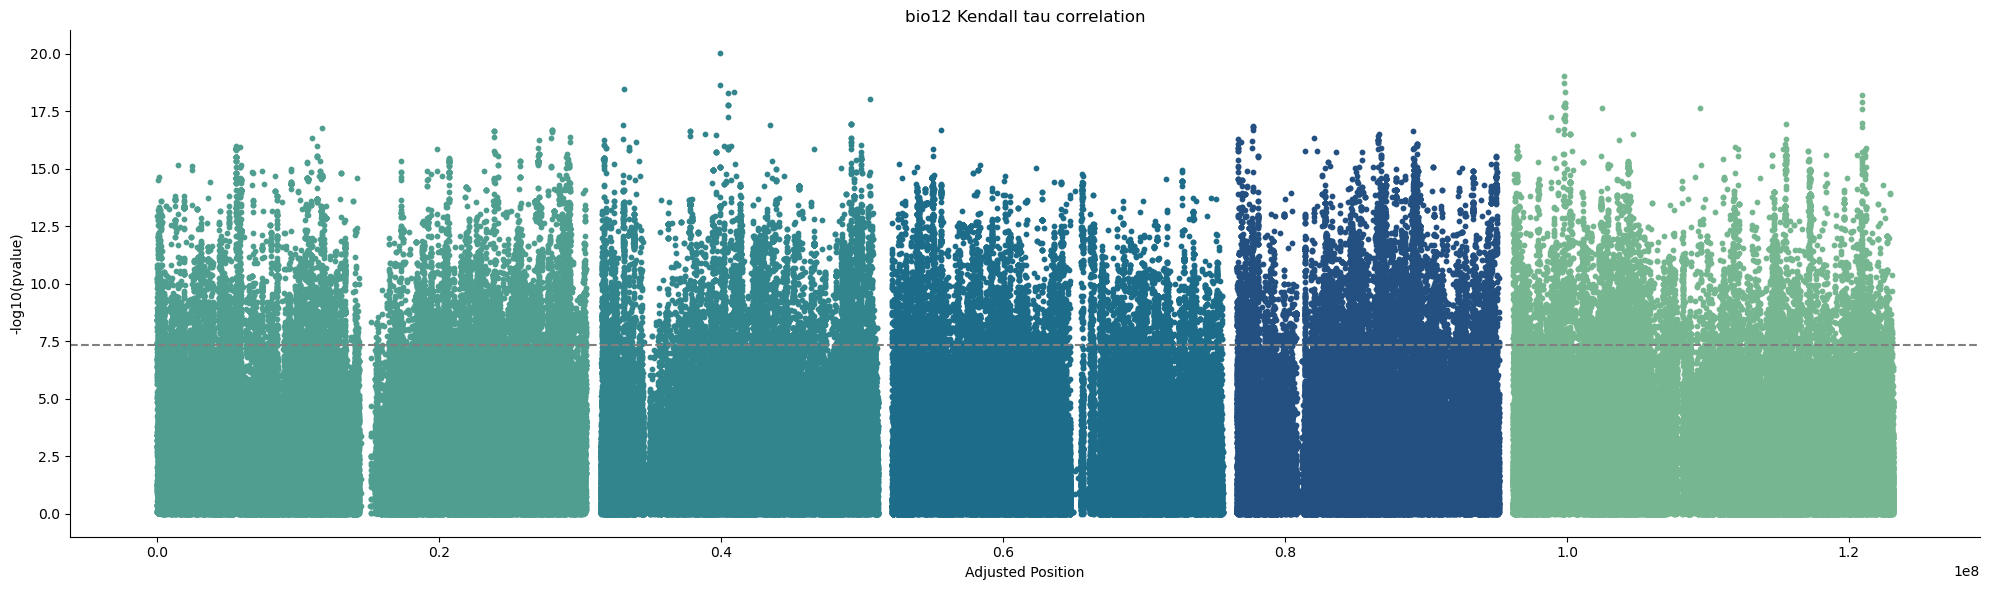

In [22]:
threshold_value = 0.05 / len(kendall)

#sm.qqplot(pvalues['pvalue'], line ='45') 
#py.show() 

df = kendall[['K_tau_p', 'pos', 'chrom']].copy()

colors = sns.color_palette("crest", n_colors = 5)

# Parsing chromosome number and position
df['chromosome'] = df['chrom']
df['position'] = df['pos']
df['-log10(pvalue)'] = -np.log10(df['K_tau_p'])

# Calculate the offset for each chromosome to prevent overlap
chromosome_offsets = {}
offset = 0
for chrom in sorted(df['chromosome'].unique()):
    chromosome_offsets[chrom] = offset
    max_position = df[df['chromosome'] == chrom]['position'].max()
    offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes

# Apply offsets to positions
df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)

# Creating the Manhattan plot
plt.figure(figsize=(20, 6))

for chrom in sorted(df['chromosome'].unique()):
    subset = df[df['chromosome'] == chrom]
    plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)

# Aesthetics
plt.xlabel('Adjusted Position')
plt.ylabel('-log10(pvalue)')
#plt.title('Manhattan Plot')
#plt.grid(axis='y')
#plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)
# Threshold line (optional)
threshold = -np.log10(threshold_value)
plt.axhline(y=threshold, color='grey', linestyle='dashed')
plt.title(f'{biovar} Kendall tau correlation')  # Set the title

# Show the plot
plt.tight_layout()
plt.savefig(f'manhattan_kendall_{biovar}.png')
plt.show()